In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from scipy.stats import entropy

In [2]:
%load_ext watermark

In [3]:
%watermark -a "Abhishek Kushwaha" -d -v -p numpy,pandas,seaborn,matplotlib,sklearn -g

Abhishek Kushwaha 2020-07-05 

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
pandas 1.0.4
seaborn 0.10.0
matplotlib 3.2.1
sklearn 0.22.1
Git hash: 39a0d8caf67c43ee6735cb69788237aa181dcade


In [4]:
current_path  = os.getcwd()
project_path  = current_path.rsplit('\\',1)[0]
raw_data_path = os.path.join(project_path,'data\\raw')
list_of_files = os.listdir(raw_data_path)
file_path     = os.path.join(raw_data_path, 'covtype.csv')

In [5]:
data = pd.read_csv(file_path)

In [6]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
data.sample(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
377284,2987,245,21,503,278,2535,172,251,212,1048,...,0,0,0,0,0,0,0,0,0,2
279103,2217,4,36,85,31,812,151,149,117,1084,...,0,0,0,0,0,0,0,0,0,6
202427,2975,61,8,342,27,824,227,223,129,2280,...,0,0,0,0,0,0,0,0,0,2
156367,2876,118,10,42,3,3292,238,231,123,2753,...,0,0,0,0,0,0,0,0,0,2
575798,2493,23,25,42,18,2165,196,178,108,782,...,0,0,0,0,0,0,0,0,0,6
47576,2919,170,4,0,0,5124,223,241,154,3383,...,0,0,0,0,0,0,0,0,0,1
424144,2747,41,16,60,12,1385,221,204,115,2556,...,0,0,0,0,0,0,0,0,0,2
97402,2657,124,24,108,42,1443,252,214,76,2419,...,0,0,0,0,0,0,0,0,0,2
249560,2774,148,19,300,-48,636,242,235,114,484,...,0,0,0,0,0,0,0,0,0,5
15687,2654,342,35,60,50,2430,129,166,162,6871,...,0,0,0,0,0,0,0,0,0,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [9]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
data.skew().sort_values(ascending=False)

Soil_Type15                           440.078023
Soil_Type7                             74.367173
Soil_Type36                            69.853269
Soil_Type8                             56.946415
Soil_Type37                            44.121596
Soil_Type25                            34.968140
Soil_Type14                            31.096237
Soil_Type21                            26.274260
Soil_Type28                            24.722103
Soil_Type27                            23.065265
Soil_Type9                             22.440005
Soil_Type5                             18.995243
Soil_Type34                            18.911839
Soil_Type35                            17.442936
Soil_Type18                            17.405794
Soil_Type26                            14.880229
Soil_Type16                            14.185489
Soil_Type1                             13.736670
Soil_Type17                            12.914877
Soil_Type19                            11.895466
Soil_Type3          

In [11]:
data['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [12]:
label = ["Cover_Type"]
columns = list(set(data.columns)-set(label))

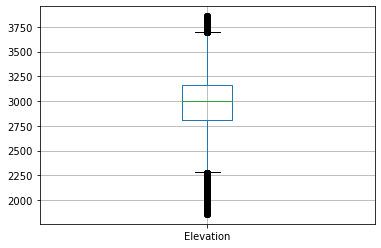

In [13]:
data.boxplot('Elevation')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD40995AC8>]],
      dtype=object)

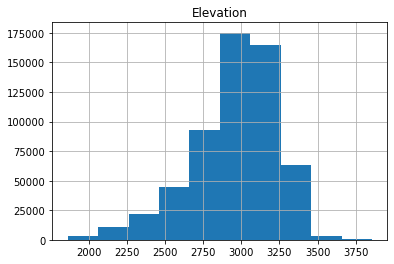

In [14]:
data.hist('Elevation')

In [15]:
data.kurtosis().sort_values(ascending=False)

Soil_Type15                           193667.333316
Soil_Type7                              5528.495386
Soil_Type36                             4877.495971
Soil_Type8                              3240.905304
Soil_Type37                             1944.721957
Soil_Type25                             1220.775045
Soil_Type14                              964.979297
Soil_Type21                              688.339121
Soil_Type28                              609.184473
Soil_Type27                              530.008286
Soil_Type9                               501.555564
Soil_Type5                               358.820507
Soil_Type34                              355.658862
Soil_Type35                              302.257067
Soil_Type18                              300.962699
Soil_Type26                              219.421979
Soil_Type16                              199.228790
Soil_Type1                               186.696732
Soil_Type17                              164.794612
Soil_Type19 

In [16]:
data.mad()

Elevation                              216.909818
Aspect                                  97.987205
Slope                                    5.923036
Horizontal_Distance_To_Hydrology       167.320973
Vertical_Distance_To_Hydrology          42.576750
Horizontal_Distance_To_Roadways       1287.298925
Hillshade_9am                           20.672563
Hillshade_Noon                          15.211841
Hillshade_3pm                           29.911981
Horizontal_Distance_To_Fire_Points    1000.037047
Wilderness_Area1                         0.494770
Wilderness_Area2                         0.097578
Wilderness_Area3                         0.491827
Wilderness_Area4                         0.119157
Soil_Type1                               0.010379
Soil_Type2                               0.025568
Soil_Type3                               0.016464
Soil_Type4                               0.041760
Soil_Type5                               0.005482
Soil_Type6                               0.022377


In [17]:
data.memory_usage()/(1024*1024) #mb

Index                                 0.000122
Elevation                             4.432770
Aspect                                4.432770
Slope                                 4.432770
Horizontal_Distance_To_Hydrology      4.432770
Vertical_Distance_To_Hydrology        4.432770
Horizontal_Distance_To_Roadways       4.432770
Hillshade_9am                         4.432770
Hillshade_Noon                        4.432770
Hillshade_3pm                         4.432770
Horizontal_Distance_To_Fire_Points    4.432770
Wilderness_Area1                      4.432770
Wilderness_Area2                      4.432770
Wilderness_Area3                      4.432770
Wilderness_Area4                      4.432770
Soil_Type1                            4.432770
Soil_Type2                            4.432770
Soil_Type3                            4.432770
Soil_Type4                            4.432770
Soil_Type5                            4.432770
Soil_Type6                            4.432770
Soil_Type7   

In [18]:
data.sem()

Elevation                             0.367318
Aspect                                0.146822
Slope                                 0.009824
Horizontal_Distance_To_Hydrology      0.278848
Vertical_Distance_To_Hydrology        0.076479
Horizontal_Distance_To_Roadways       2.045618
Hillshade_9am                         0.035120
Hillshade_Noon                        0.025935
Hillshade_3pm                         0.050213
Horizontal_Distance_To_Fire_Points    1.737239
Wilderness_Area1                      0.000653
Wilderness_Area2                      0.000290
Wilderness_Area3                      0.000651
Wilderness_Area4                      0.000320
Soil_Type1                            0.000095
Soil_Type2                            0.000148
Soil_Type3                            0.000119
Soil_Type4                            0.000190
Soil_Type5                            0.000069
Soil_Type6                            0.000139
Soil_Type7                            0.000018
Soil_Type8   

In [19]:
data.mode()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2968,45,11,30,0,150,226,228,143,618,...,0,0,0,0,0,0,0,0,0,2


In [20]:
data.pct_change()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.002311,0.098039,-0.333333,-0.178295,-inf,-0.235294,-0.004525,0.012931,0.020270,-0.008600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,0.082625,1.482143,3.500000,0.264151,-11.833333,7.153846,0.063636,0.012766,-0.105960,-0.016707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.6
3,-0.006776,0.115108,1.000000,-0.097015,0.815385,-0.028302,0.017094,0.000000,-0.096296,0.014703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,-0.068223,-0.709677,-0.888889,-0.367769,-1.008475,-0.873463,-0.075630,-0.016807,0.229508,-0.006279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-0.002082,-0.025478,-0.047619,-0.055556,0.133333,-0.100000,0.008403,-0.004202,-0.008403,0.008434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
581008,-0.002087,-0.006536,-0.050000,-0.211765,-0.294118,-0.120370,0.000000,0.000000,0.008475,0.009558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
581009,-0.002091,0.046053,-0.105263,-0.104478,-0.416667,-0.052632,-0.016667,0.016878,0.092437,0.010651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
581010,-0.000838,0.069182,-0.117647,0.000000,-0.285714,0.000000,-0.025424,0.016598,0.100000,0.011710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [21]:
data.rank()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,62290.0,126731.0,17872.5,330261.5,74476.0,46287.5,323876.5,370287.5,324831.5,575469.5,...,264247.0,267929.5,289701.0,289561.0,290447.0,290357.5,282720.0,283603.5,286131.5,538389.0
1,60612.5,139433.0,8199.5,278741.0,33452.0,30251.5,313793.0,408603.0,344298.0,574609.0,...,264247.0,267929.5,289701.0,289561.0,290447.0,290357.5,282720.0,283603.5,286131.5,538389.0
2,142615.0,309626.0,157890.0,334473.0,425637.0,422671.5,462511.5,442532.5,237631.0,572916.0,...,264247.0,267929.5,289701.0,289561.0,290447.0,290357.5,282720.0,283603.5,286131.5,353491.0
3,133024.0,331556.5,426953.0,313031.0,519435.5,414081.0,498935.5,442532.5,160711.0,574364.5,...,264247.0,267929.5,289701.0,289561.0,290447.0,290357.5,282720.0,283603.5,286131.5,353491.0
4,62002.0,111252.5,8199.5,213329.0,52714.5,30981.0,313793.0,396391.0,337984.0,573727.5,...,264247.0,267929.5,289701.0,289561.0,290447.0,290357.5,282720.0,283603.5,286131.5,538389.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,27788.0,329193.0,464865.5,114672.0,218662.5,2686.5,515307.5,431821.5,139437.0,105672.0,...,264247.0,267929.5,289701.0,289561.0,290447.0,290357.5,282720.0,283603.5,286131.5,513018.5
581008,27182.5,327669.0,447027.5,100190.0,183794.0,2169.5,515307.5,431821.5,144390.5,107209.0,...,264247.0,267929.5,289701.0,289561.0,290447.0,290357.5,282720.0,283603.5,286131.5,513018.5
581009,26584.5,336617.5,404764.0,82984.0,146218.0,1792.5,481379.5,472599.5,206591.0,109572.0,...,264247.0,267929.5,289701.0,289561.0,290447.0,290357.5,282720.0,283603.5,286131.5,513018.5
581010,26349.5,349375.0,352032.0,82984.0,129450.5,1792.5,421402.0,508485.5,291531.0,110947.0,...,264247.0,267929.5,289701.0,289561.0,290447.0,290357.5,282720.0,283603.5,286131.5,513018.5


In [22]:
data.select_dtypes('int64')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [23]:
data.rolling(2, win_type="bohman").sum(std=3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
data.all()

Elevation                              True
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
Wilderness_Area1                      False
Wilderness_Area2                      False
Wilderness_Area3                      False
Wilderness_Area4                      False
Soil_Type1                            False
Soil_Type2                            False
Soil_Type3                            False
Soil_Type4                            False
Soil_Type5                            False
Soil_Type6                            False
Soil_Type7                            False
Soil_Type8                            False
Soil_Type9                      

In [25]:
from sklearn import tree

In [26]:
clf = tree.DecisionTreeClassifier(max_depth=6,
                                 max_features=10,
                                 )

In [27]:
clf.fit(data[columns], data[label])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
from sklearn.tree import export_text

In [41]:
r = export_text(clf, feature_names=list(data[columns].columns))

In [43]:
print(r)

|--- Soil_Type4 <= 0.50
|   |--- Soil_Type12 <= 0.50
|   |   |--- Elevation <= 3044.50
|   |   |   |--- Soil_Type29 <= 0.50
|   |   |   |   |--- Elevation <= 2495.50
|   |   |   |   |   |--- Wilderness_Area3 <= 0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- Wilderness_Area3 >  0.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |--- Elevation >  2495.50
|   |   |   |   |   |--- Soil_Type23 <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Soil_Type23 >  0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- Soil_Type29 >  0.50
|   |   |   |   |--- Elevation <= 2955.50
|   |   |   |   |   |--- Hillshade_3pm <= 84.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Hillshade_3pm >  84.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- Elevation >  2955.50
|   |   |   |   |   |--- Horizontal_Distance_To_Roadways <= 3361.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Horizontal_Distance_To_Roa

[Text(170.19, 201.90857142857143, 'X[43] <= 0.5\ngini = 0.623\nsamples = 581012\nvalue = [211840, 283301, 35754, 2747, 9493, 17367, 20510]'),
 Text(86.83875, 170.84571428571428, 'X[30] <= 0.5\ngini = 0.614\nsamples = 568616\nvalue = [211658, 280050, 28253, 2579, 8908, 16736, 20432]'),
 Text(44.64, 139.78285714285715, 'X[24] <= 3044.5\ngini = 0.624\nsamples = 538645\nvalue = [208965, 252772, 28253, 2579, 8908, 16736, 20432]'),
 Text(22.32, 108.72, 'X[4] <= 0.5\ngini = 0.565\nsamples = 294748\nvalue = [54796, 183470, 28253, 2579, 8908, 16736, 6]'),
 Text(11.16, 77.65714285714284, 'X[24] <= 2495.5\ngini = 0.613\nsamples = 225968\nvalue = [40191, 130427, 28253, 2579, 7776, 16736, 6]'),
 Text(5.58, 46.59428571428572, 'X[8] <= 0.5\ngini = 0.579\nsamples = 37554\nvalue = [8, 2360, 21336, 2575, 50, 11225, 0]'),
 Text(2.79, 15.531428571428563, 'gini = 0.561\nsamples = 33121\nvalue = [0, 1503, 19623, 2575, 50, 9370, 0]'),
 Text(8.370000000000001, 15.531428571428563, 'gini = 0.638\nsamples = 4433

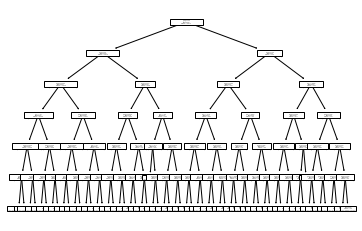

In [28]:
tree.plot_tree(clf)

In [44]:
import graphviz 

In [45]:
dot_data = tree.export_graphviz(clf, out_file=None) 

In [46]:
graph = graphviz.Source(dot_data) 

In [47]:
graph.render("forestfireprediction")

'forestfireprediction.pdf'

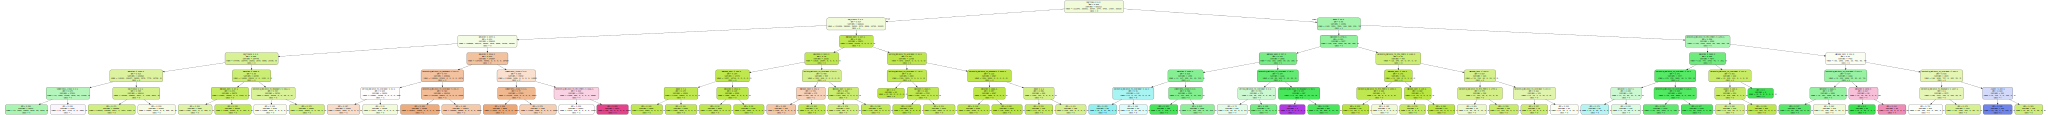

In [51]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=list(data[columns].columns),  
                      class_names=label[0],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [52]:
graph.render("forestfire") 

'forestfire.pdf'